In [1]:
from quchem.Hamiltonian_Generator_Functions import *
from quchem.Graph import *


In [2]:
from quchem.LCU_method import *
from quchem.Unitary_partitioning import * 
from quchem.quantum_circuit_functions import *
from quchem.Ansatz_Generator_Functions import *

In [3]:
# N_index=0
# S_index=0
# molecule_list=['H2']

# for Molecule in molecule_list:
#     ### HAMILTONIAN start
#     geometry = None # [('H', (0., 0., 0.)), ('H', (0., 0., 0.74))]
#     basis = 'sto-6g'


#     ### Get Hamiltonian
#     Hamilt = Hamiltonian_PySCF(Molecule,
#                          run_scf=1, run_mp2=1, run_cisd=1, run_ccsd=1, run_fci=1,
#                          basis=basis,
#                          multiplicity=1,
#                          geometry=geometry)  # normally None!
#     QubitHamiltonian = Hamilt.Get_Qubit_Hamiltonian(threshold=None, transformation='BK')
#     ### HAMILTONIAN end
    
    
#     ## Graph
#     Hamiltonian_graph_obj = Openfermion_Hamiltonian_Graph(QubitHamiltonian)

#     commutativity_flag = 'AC' ## <- defines relationship between sets!!!
#     plot_graph = False
#     Graph_colouring_strategy='largest_first'
#     anti_commuting_sets = Hamiltonian_graph_obj.Get_Clique_Cover_as_QubitOp(commutativity_flag, 
#                                                                             Graph_colouring_strategy=Graph_colouring_strategy,
#                                                                             plot_graph=plot_graph)

    
#     ## ansatz
#     ansatz_obj = Ansatz(Hamilt.molecule.n_electrons, Hamilt.molecule.n_qubits)
    
#     Sec_Quant_CC_ops_ia, Sec_Quant_CC_ops_ijab, theta_parameters_ia, theta_parameters_ijab=ansatz_obj.Get_ia_and_ijab_terms(single_cc_amplitudes=None, 
#                                                                                                              double_cc_amplitudes=None, 
#                                                                                                              singles_hamiltonian=None,
#                                                                                                              doubles_hamiltonian=None, 
#                                                                                                              tol_filter_small_terms = None)

#     Qubit_Op_list_Second_Quant_CC_Ops_ia, Qubit_Op_list_Second_Quant_CC_Ops_ijab = ansatz_obj.UCCSD_single_trotter_step(
#                                             Sec_Quant_CC_ops_ia,
#                                             Sec_Quant_CC_ops_ijab,
#                                            transformation='JW')
    
#     ## UCCSD circuit
    
    
#     input_state=ansatz_obj.Get_JW_HF_state_in_OCC_basis()
#     ansatz_Q_Circ_obj = Ansatz_Circuit(input_state,
#                                      Qubit_Op_list_Second_Quant_CC_Ops_ia, 
#                                      Qubit_Op_list_Second_Quant_CC_Ops_ijab)

#     ansatz_circuit =ansatz_Q_Circ_obj.Get_Full_HF_UCCSD_QC(
#                                 Theta_param_list_ia=theta_parameters_ia, 
#                                  Theta_param_list_ijab=theta_parameters_ijab,
#                                  ia_first=True)
    
    
#     ### standard circuit
#     total_standard=[]
#     for qubitOP in QubitHamiltonian:
#         if list(qubitOP.terms.keys())[0] != ():
#             Q_Circuit = Generate_Full_Q_Circuit(ansatz_circuit, qubitOP)
#             gate_dict, total_gate = Total_Gate_Count(Q_Circuit,
#                                                      M_gates_included=True, 
#                                                      only_one_two_qubit_gates=True)
#             total_standard.append(total_gate)
    
    
#     ### LCU
#     total_LCU=[]
#     for key in anti_commuting_sets:
#         if len(anti_commuting_sets[key])>1:
#             R_uncorrected, Pn, gamma_l = Get_R_op_list(anti_commuting_sets[key], N_index)
#             R_corrected_Op_list, R_corr_list, ancilla_amplitudes, l1_norm = absorb_complex_phases(R_uncorrected)

#             LCU_Q_circuit = Full_Q_Circuit(Pn,
#                                            R_corrected_Op_list,
#                                            R_corr_list,
#                                            ancilla_amplitudes,
#                                            Hamilt.molecule.n_qubits,
#                                            ansatz_circuit)
#             LCU_gate_dict, LCU_total_gate = Total_Gate_Count(Q_Circuit,
#                                                      M_gates_included=True, 
#                                                      only_one_two_qubit_gates=True)
#             total_LCU.append(LCU_total_gate)
    
#     ### Conj
#     total_Conj=[]
#     for key in anti_commuting_sets:
#         if len(anti_commuting_sets[key])>1:
#             normalised_set = Get_beta_j_cofactors(anti_commuting_sets[key])
#             X_sk_dict = Get_X_sk_operators(normalised_set, S=S_index)
#             Conj_Q_circuit = Generate_Full_Q_Circuit_unitary_part(ansatz_circuit, X_sk_dict)
#             Conj_gate_dict, Conj_total_gate = Total_Gate_Count(Q_Circuit,
#                                                      M_gates_included=True, 
#                                                      only_one_two_qubit_gates=True)
#             total_Conj.append(Conj_total_gate)

In [3]:
N_index=0
S_index=0
molecule_list=['H2', 'LiH', 'BeH2', 'H2O']#, 'CH4']


output=[]
output_multi_count=[]
for Molecule in molecule_list:
    
    
    ### HAMILTONIAN start
    geometry = None # [('H', (0., 0., 0.)), ('H', (0., 0., 0.74))]
    basis = 'sto-6g'


    ### Get Hamiltonian
    Hamilt = Hamiltonian_PySCF(Molecule,
                         run_scf=1, run_mp2=1, run_cisd=1, run_ccsd=1, run_fci=1,
                         basis=basis,
                         multiplicity=1,
                         geometry=geometry)  # normally None!
    QubitHamiltonian = Hamilt.Get_Qubit_Hamiltonian(threshold=None, transformation='JW')
    ### HAMILTONIAN end
    
    
    ## Graph
    Hamiltonian_graph_obj = Openfermion_Hamiltonian_Graph(QubitHamiltonian)

    commutativity_flag = 'AC' ## <- defines relationship between sets!!!
    plot_graph = False
    Graph_colouring_strategy='largest_first'
    anti_commuting_sets = Hamiltonian_graph_obj.Get_Clique_Cover_as_QubitOp(commutativity_flag, 
                                                                            Graph_colouring_strategy=Graph_colouring_strategy,
                                                                            plot_graph=plot_graph)

    
#     ## ansatz
#     ansatz_obj = Ansatz(Hamilt.molecule.n_electrons, Hamilt.molecule.n_qubits)
    
#     Sec_Quant_CC_ops_ia, Sec_Quant_CC_ops_ijab, theta_parameters_ia, theta_parameters_ijab=ansatz_obj.Get_ia_and_ijab_terms(single_cc_amplitudes=None, 
#                                                                                                              double_cc_amplitudes=None, 
#                                                                                                              singles_hamiltonian=None,
#                                                                                                              doubles_hamiltonian=None, 
#                                                                                                              tol_filter_small_terms = None)

#     Qubit_Op_list_Second_Quant_CC_Ops_ia, Qubit_Op_list_Second_Quant_CC_Ops_ijab = ansatz_obj.UCCSD_single_trotter_step(
#                                             Sec_Quant_CC_ops_ia,
#                                             Sec_Quant_CC_ops_ijab,
#                                            transformation='JW')
    
    ## UCCSD circuit
    
    
#     input_state=ansatz_obj.Get_JW_HF_state_in_OCC_basis()
#     ansatz_Q_Circ_obj = Ansatz_Circuit(input_state,
#                                      Qubit_Op_list_Second_Quant_CC_Ops_ia, 
#                                      Qubit_Op_list_Second_Quant_CC_Ops_ijab)

#     ansatz_circuit =ansatz_Q_Circ_obj.Get_Full_HF_UCCSD_QC(
#                                 Theta_param_list_ia=theta_parameters_ia, 
#                                  Theta_param_list_ijab=theta_parameters_ijab,
#                                  ia_first=True)
    ansatz_circuit = cirq.Circuit()
    
    
    ### standard circuit
#     for qubitOP in QubitHamiltonian:
#         if list(qubitOP.terms.keys())[0] != ():
#             Q_Circuit_obj = change_pauliword_to_Z_basis_then_measure(qubitOP)
#             gate_dict, total_gate = Total_Gate_Count(Q_Circuit,
#                                                      M_gates_included=True, 
#                                                      only_one_two_qubit_gates=True)
#             break
    total_gate = Hamilt.molecule.n_qubits
    
    ### LCU
    for key in anti_commuting_sets:
        if len(anti_commuting_sets[key])>1:
            R_uncorrected, Pn, gamma_l = Get_R_op_list(anti_commuting_sets[key], N_index)
            R_corrected_Op_list, R_corr_list, ancilla_amplitudes, l1_norm = absorb_complex_phases(R_uncorrected)

            LCU_Q_circuit = Full_Q_Circuit(Pn,
                                           R_corrected_Op_list,
                                           R_corr_list,
                                           ancilla_amplitudes,
                                           Hamilt.molecule.n_qubits,
                                           ansatz_circuit)
            LCU_gate_dict, LCU_total_gate = Total_Gate_Count(LCU_Q_circuit,
                                                     M_gates_included=True, 
                                                     only_one_two_qubit_gates=True)
            
            LCU_total_g_multi_dict, LCU_total_g_multi = Total_Gate_Count(LCU_Q_circuit,
                                                     M_gates_included=True, 
                                                     only_one_two_qubit_gates=False)
            break
    
    ### Conj
    for key in anti_commuting_sets:
        if len(anti_commuting_sets[key])>1:
            normalised_set = Get_beta_j_cofactors(anti_commuting_sets[key])
            X_sk_dict = Get_X_sk_operators(normalised_set, S=S_index)
            Conj_Q_circuit = Generate_Full_Q_Circuit_unitary_part(ansatz_circuit, X_sk_dict)
            
            Conj_gate_dict, Conj_total_gate = Total_Gate_Count(Conj_Q_circuit,
                                                     M_gates_included=True, 
                                                     only_one_two_qubit_gates=True)
            
            Conj_total_g_multi_dict, Conj_total_g_multi = Total_Gate_Count(Conj_Q_circuit,
                                                     M_gates_included=True, 
                                                     only_one_two_qubit_gates=False)
            break
    
    
    different_approaches_one_two={
                        'standard': {'gates': total_gate,
                                 'repeats': len(list(QubitHamiltonian))
                                    },

                        'LCU': {'gates': LCU_total_gate,
                                 'repeats': len(anti_commuting_sets)
                                    },

                        'Conj': {'gates': Conj_total_gate,
                                 'repeats': len(anti_commuting_sets)
                                    }
                        }
    
    multi_gate ={
                    'LCU_gates': LCU_total_g_multi,
                    'Conj_gates':Conj_total_g_multi
                    }

    output.append(different_approaches_one_two)
    output_multi_count.append(multi_gate)

Building Graph Edges: 100%|##########| 1388/1388 [01:30<00:00, 15.31it/s] 


In [64]:
output

[{'standard': {'gates': 4, 'repeats': 15},
  'LCU': {'gates': 12, 'repeats': 11},
  'Conj': {'gates': 21, 'repeats': 11}},
 {'standard': {'gates': 12, 'repeats': 631},
  'LCU': {'gates': 164, 'repeats': 101},
  'Conj': {'gates': 105, 'repeats': 101}},
 {'standard': {'gates': 14, 'repeats': 2082},
  'LCU': {'gates': 440, 'repeats': 231},
  'Conj': {'gates': 407, 'repeats': 231}},
 {'standard': {'gates': 14, 'repeats': 1388},
  'LCU': {'gates': 238, 'repeats': 174},
  'Conj': {'gates': 147, 'repeats': 174}}]

In [65]:
output_multi_count

[{'LCU_gates': 9, 'Conj_gates': 21},
 {'LCU_gates': 99, 'Conj_gates': 105},
 {'LCU_gates': 257, 'Conj_gates': 407},
 {'LCU_gates': 140, 'Conj_gates': 147}]

In [5]:
standard=[]
LCU=[]
Conj=[]
for result in output:
    standard.append(result['standard']['gates'])
    LCU.append(result['LCU']['gates'])
    Conj.append(result['Conj']['gates'])
    
standard_repeats=[]
LCU_repeats=[]
Conj_repeats=[]
for result in output:
    standard_repeats.append(result['standard']['repeats'])
    LCU_repeats.append(result['LCU']['repeats'])
    Conj_repeats.append(result['Conj']['repeats'])

    
multi_LCU=[]
multi_Conj=[]
for result in output_multi_count:
    multi_LCU.append(result['LCU_gates'])
    multi_Conj.append(result['Conj_gates'])

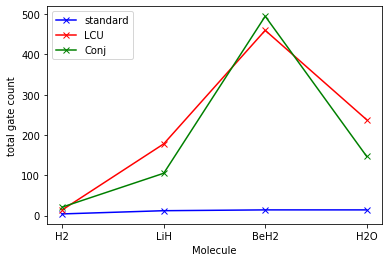

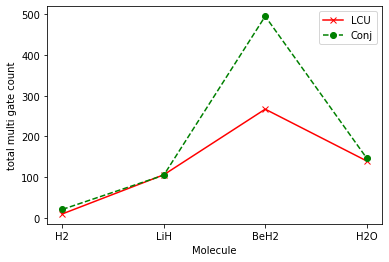

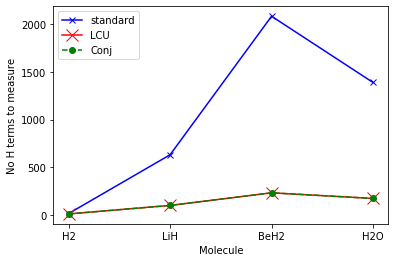

In [6]:
## import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()

plt.plot(molecule_list, standard, label = "standard",  marker='x', linestyle='-', linewidth=1.5, color='blue')
plt.plot(molecule_list, LCU, label = "LCU", marker='x', linestyle='-', linewidth=1.5, color='red')
plt.plot(molecule_list, Conj, label = "Conj", marker='x', linestyle='-', linewidth=1.5, color='green')

plt.xlabel('Molecule')
plt.ylabel('total gate count')
plt.legend()
plt.show()


plt.figure()
plt.plot(molecule_list, multi_LCU, label = "LCU", marker='x', linestyle='-', linewidth=1.5, color='red')
plt.plot(molecule_list, multi_Conj, label = "Conj", marker='o', linestyle='--', linewidth=1.5, color='green')
plt.xlabel('Molecule')
plt.ylabel('total multi gate count')
plt.legend()
plt.show()


plt.figure()
plt.plot(molecule_list, standard_repeats, label = "standard",  marker='x', linestyle='-', linewidth=1.5, color='blue')
plt.plot(molecule_list, LCU_repeats, label = "LCU", marker='x', linestyle='-', linewidth=1.5, color='red', markersize=12)
plt.plot(molecule_list, Conj_repeats, label = "Conj", marker='o', linestyle='--', linewidth=1.5, color='green')
plt.xlabel('Molecule')
plt.ylabel('No H terms to measure')
plt.legend()
plt.show()



In [70]:
cirq.Circuit(cirq.decompose(LCU_Q_circuit))

0: ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────Y──────────────────────────────────────────────────────X────────────────────────────────────X──────────────────────────────────────────────────────────────────────────────────────────────────────────────────X───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
                                                                                                                                                 │                                                      │                                    │                                                                                                                  │
1: ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┼─────X──────────────────Y─────────────────────────────┼─────Z──────────────────────────────┼─────Z───────────────────────────────────────────────────────────Y────────────────────────────────────────────────┼─────Z──────────────────────────────────────────────────────────────────Y──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
                                                                                                                                                 │     │                  │                             │     │                              │     │                                                           │                                                │     │                                                                  │
2: ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┼─────┼──────────────────┼─────X───────────────────────┼─────┼─────Z────────────────────────┼─────┼─────Z─────────────────────────────────────────────────────┼─────Z──────────────────────────────────────────┼─────┼─────Z────────────────────────────────────────────────────────────┼───Z──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
                                                                                                                                                 │     │                  │     │                       │     │     │                        │     │     │                                                     │     │                                          │     │     │                                                            │   │
3: ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┼─────┼──────────────────┼─────┼───────────────────────┼─────┼─────┼─────X──────────────────┼─────┼─────┼─────Z───────────────────────────────────────────────┼─────┼─────Z────────────────────────────────────┼─────┼─────┼─────Z──────────────────────────────────────────────────────┼───┼───Z──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
                                                                                                                                                 │     │                  │     │                       │     │     │     │                  │     │     │     │                                               │     │     │                                    │     │     │   

In [9]:
# https://cirq.readthedocs.io/en/stable/circuits.html
from cirq.circuits import InsertStrategy

In [10]:
N_index=0
S_index=0
molecule_list=['H2', 'LiH', 'BeH2', 'H2O']#, 'CH4']


output=[]
output_multi_count=[]
for Molecule in molecule_list:
    
    
    ### HAMILTONIAN start
    geometry = None # [('H', (0., 0., 0.)), ('H', (0., 0., 0.74))]
    basis = 'sto-6g'


    ### Get Hamiltonian
    Hamilt = Hamiltonian_PySCF(Molecule,
                         run_scf=1, run_mp2=1, run_cisd=1, run_ccsd=1, run_fci=1,
                         basis=basis,
                         multiplicity=1,
                         geometry=geometry)  # normally None!
    QubitHamiltonian = Hamilt.Get_Qubit_Hamiltonian(threshold=None, transformation='JW')
    ### HAMILTONIAN end
    
    
    ## Graph
    Hamiltonian_graph_obj = Openfermion_Hamiltonian_Graph(QubitHamiltonian)

    commutativity_flag = 'AC' ## <- defines relationship between sets!!!
    plot_graph = False
    Graph_colouring_strategy='largest_first'
    anti_commuting_sets = Hamiltonian_graph_obj.Get_Clique_Cover_as_QubitOp(commutativity_flag, 
                                                                            Graph_colouring_strategy=Graph_colouring_strategy,
                                                                            plot_graph=plot_graph)

    
    ansatz_circuit = cirq.Circuit()
    
    
    ### standard circuit
#     for qubitOP in QubitHamiltonian:
#         if list(qubitOP.terms.keys())[0] != ():
#             Q_Circuit_obj = change_pauliword_to_Z_basis_then_measure(qubitOP)
#             gate_dict, total_gate = Total_Gate_Count(Q_Circuit,
#                                                      M_gates_included=True, 
#                                                      only_one_two_qubit_gates=True)
#             break
    total_gate = Hamilt.molecule.n_qubits #O(N) change of basis gates required!
    
    ### LCU
    for key in anti_commuting_sets:
        if len(anti_commuting_sets[key])>1:
            R_uncorrected, Pn, gamma_l = Get_R_op_list(anti_commuting_sets[key], N_index)
            R_corrected_Op_list, R_corr_list, ancilla_amplitudes, l1_norm = absorb_complex_phases(R_uncorrected)

            Q_circ_LCU = Full_Q_Circuit(Pn,
                                           R_corrected_Op_list,
                                           R_corr_list,
                                           ancilla_amplitudes,
                                           Hamilt.molecule.n_qubits,
                                           ansatz_circuit)
            
            LCU_Q_circuit = cirq.Circuit(list(Q_circ_LCU.all_operations()), strategy=InsertStrategy.EARLIEST)
            
            LCU_gate_dict, LCU_total_gate = Total_Gate_Count(LCU_Q_circuit,
                                                     M_gates_included=True, 
                                                     only_one_two_qubit_gates=True)
            
            LCU_total_g_multi_dict, LCU_total_g_multi = Total_Gate_Count(LCU_Q_circuit,
                                                     M_gates_included=True, 
                                                     only_one_two_qubit_gates=False)
            break
    
    ### Conj
    for key in anti_commuting_sets:
        if len(anti_commuting_sets[key])>1:
            normalised_set = Get_beta_j_cofactors(anti_commuting_sets[key])
            X_sk_dict = Get_X_sk_operators(normalised_set, S=S_index)
            
            Q_circ_Conj = Generate_Full_Q_Circuit_unitary_part(ansatz_circuit, X_sk_dict)
            Conj_Q_circuit = cirq.Circuit(list(Q_circ_Conj.all_operations()), strategy=InsertStrategy.EARLIEST)
            
            Conj_gate_dict, Conj_total_gate = Total_Gate_Count(Conj_Q_circuit,
                                                     M_gates_included=True, 
                                                     only_one_two_qubit_gates=True)
            
            Conj_total_g_multi_dict, Conj_total_g_multi = Total_Gate_Count(Conj_Q_circuit,
                                                     M_gates_included=True, 
                                                     only_one_two_qubit_gates=False)
            break
    
    
    different_approaches_one_two={
                        'standard': {'gates': total_gate,
                                 'repeats': len(list(QubitHamiltonian))
                                    },

                        'LCU': {'gates': LCU_total_gate,
                                 'repeats': len(anti_commuting_sets)
                                    },

                        'Conj': {'gates': Conj_total_gate,
                                 'repeats': len(anti_commuting_sets)
                                    }
                        }
    
    multi_gate ={
                    'LCU_gates': LCU_total_g_multi,
                    'Conj_gates':Conj_total_g_multi
                    }

    output.append(different_approaches_one_two)
    output_multi_count.append(multi_gate)


Building Graph Edges: 100%|##########| 15/15 [00:00<00:00, 643.28it/s]

Building Graph Edges:  47%|####7     | 299/631 [00:13<00:10, 31.40it/s]


Building Graph Edges: 100%|##########| 631/631 [00:18<00:00, 34.62it/s] 

Building Graph Edges:   3%|3         | 64/2082 [00:12<06:32,  5.14it/s]


Building Graph Edges:   8%|8         | 173/2082 [00:33<05:40,  5.60it/s]


Building Graph Edges:  13%|#3        | 280/2082 [00:52<05:05,  5.90it/s]


Building Graph Edges:  19%|#8        | 387/2082 [01:10<04:44,  5.96it/s]


Building Graph Edges:  24%|##3       | 494/2082 [01:26<03:58,  6.65it/s]


Building Graph Edges:  29%|##8       | 601/2082 [01:42<03:23,  7.26it/s]


Building Graph Edges:  34%|###4      | 708/2082 [01:56<03:02,  7.52it/s]


Building Graph Edges:  39%|###9      | 816/2082 [02:10<02:28,  8.51it/s]


Building Graph Edges:  44%|####4     | 926/2082 [02:23<02:04,  9.31it/s]


Building Graph Edges:  52%|#####1    | 1078/2082 [02:38<01:37, 10.28it/s]


Building Graph Edges:  62%|######1   | 1290/2082 [02:56<01:00, 13.02it/s]


Building Graph Edges:  72%|#######2  | 1504/2082 [03:10<00:31, 18.47it/s]


Building Graph Edges:  88%|########7 | 1832/2082 [03:23<00:06, 39.95it/s]


Building Graph Edges: 100%|##########| 2082/2082 [03:26<00:00, 10.09it/s] 

Building Graph Edges:   6%|5         | 83/1388 [00:10<02:42,  8.02it/s]


Building Graph Edges:  14%|#4        | 195/1388 [00:23<02:07,  9.32it/s]


Building Graph Edges:  26%|##5       | 356/1388 [00:39<01:35, 10.77it/s]


Building Graph Edges:  41%|####1     | 570/1388 [00:58<01:02, 13.03it/s]


Building Graph Edges:  56%|#####6    | 784/1388 [01:12<00:35, 16.89it/s]


Building Graph Edges:  80%|#######9  | 1104/1388 [01:25<00:07, 37.59it/s]


Building Graph Edges: 100%|##########| 1388/1388 [01:29<00:00, 15.55it/s] 


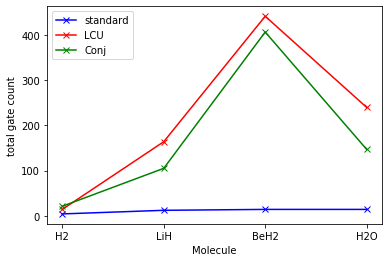

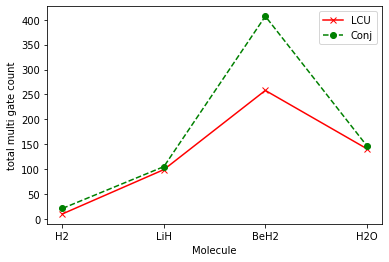

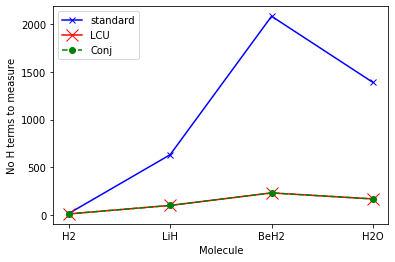

In [11]:
standard=[]
LCU=[]
Conj=[]
for result in output:
    standard.append(result['standard']['gates'])
    LCU.append(result['LCU']['gates'])
    Conj.append(result['Conj']['gates'])
    
standard_repeats=[]
LCU_repeats=[]
Conj_repeats=[]
for result in output:
    standard_repeats.append(result['standard']['repeats'])
    LCU_repeats.append(result['LCU']['repeats'])
    Conj_repeats.append(result['Conj']['repeats'])

    
multi_LCU=[]
multi_Conj=[]
for result in output_multi_count:
    multi_LCU.append(result['LCU_gates'])
    multi_Conj.append(result['Conj_gates'])
    
    
## import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()

plt.plot(molecule_list, standard, label = "standard",  marker='x', linestyle='-', linewidth=1.5, color='blue')
plt.plot(molecule_list, LCU, label = "LCU", marker='x', linestyle='-', linewidth=1.5, color='red')
plt.plot(molecule_list, Conj, label = "Conj", marker='x', linestyle='-', linewidth=1.5, color='green')

plt.xlabel('Molecule')
plt.ylabel('total gate count')
plt.legend()
plt.show()


plt.figure()
plt.plot(molecule_list, multi_LCU, label = "LCU", marker='x', linestyle='-', linewidth=1.5, color='red')
plt.plot(molecule_list, multi_Conj, label = "Conj", marker='o', linestyle='--', linewidth=1.5, color='green')
plt.xlabel('Molecule')
plt.ylabel('total multi gate count')
plt.legend()
plt.show()


plt.figure()
plt.plot(molecule_list, standard_repeats, label = "standard",  marker='x', linestyle='-', linewidth=1.5, color='blue')
plt.plot(molecule_list, LCU_repeats, label = "LCU", marker='x', linestyle='-', linewidth=1.5, color='red', markersize=12)
plt.plot(molecule_list, Conj_repeats, label = "Conj", marker='o', linestyle='--', linewidth=1.5, color='green')
plt.xlabel('Molecule')
plt.ylabel('No H terms to measure')
plt.legend()
plt.show()

